# **DeFungi Dataset**

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.model_selection import train_test_split
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random
import shutil
import os

In [22]:
initial_dataset_dir = "defungi"

# Checking whether the dataset has been successfully extracted
os.listdir(initial_dataset_dir)

['H1', 'H2', 'H3', 'H5', 'H6']

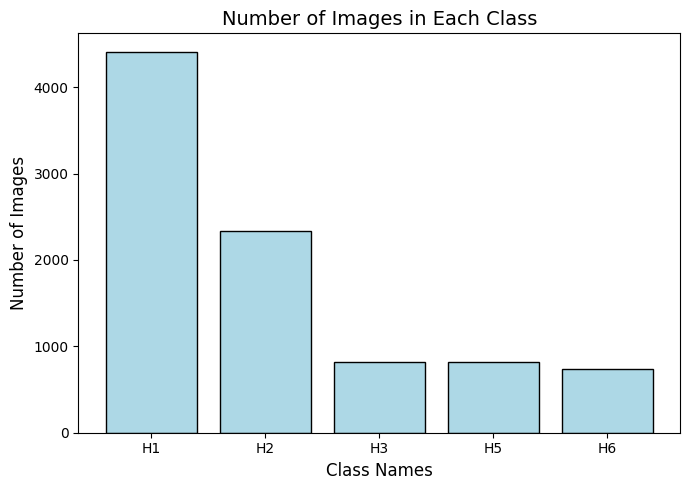

In [23]:
class_image_counts = {}

# Loop through each class folder
for class_folder in os.listdir(initial_dataset_dir):
    class_path = os.path.join(initial_dataset_dir, class_folder)

    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        class_image_counts[class_folder] = num_images

# Gettting class names and counts
classes = list(class_image_counts.keys())
counts = list(class_image_counts.values())

# Plotting the bar graph
plt.figure(figsize=(7,5))
plt.bar(classes, counts, color='lightblue', edgecolor='black')

plt.xlabel("Class Names", fontsize=12)
plt.ylabel("Number of Images", fontsize=12)
plt.title("Number of Images in Each Class", fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()


In [24]:
# Directories
initial_dataset_dir = "defungi"
balanced_dir = "balanced_dataset"


# # ###----------Do not run(This should run only once) -------------###

# # Target size for all classes
# target_size = 804

# # Ensure the balanced directory exists
# os.makedirs(balanced_dir, exist_ok=True)

# # Data augmentation setup
# datagen = ImageDataGenerator(
#     rotation_range=15,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     zoom_range=0.1,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

# # Dictionary to store the count of images in each class
# class_image_counts = {
#     class_folder: len(os.listdir(os.path.join(initial_dataset_dir, class_folder)))
#     for class_folder in os.listdir(initial_dataset_dir)
#     if os.path.isdir(os.path.join(initial_dataset_dir, class_folder))
# }

# # Balancing the dataset
# for class_folder, num_images in class_image_counts.items():
#     class_path = os.path.join(initial_dataset_dir, class_folder)
#     balanced_class_path = os.path.join(balanced_dir, class_folder)
#     os.makedirs(balanced_class_path, exist_ok=True)

#     image_files = os.listdir(class_path)

#     # For undersampling classes
#     if num_images > target_size:
#         print(f"Undersampling {class_folder}: Reducing {num_images} to {target_size} images.")
#         sampled_files = random.sample(image_files, target_size)
#         for img_file in sampled_files:
#             shutil.copy(os.path.join(class_path, img_file), balanced_class_path)
#     # For classes with fewer images than target size Copying existing images
#     else:
#         sampled_files = image_files
#         for img_file in sampled_files:
#             shutil.copy(os.path.join(class_path, img_file), balanced_class_path)

#         # Augment underrepresented classes
#         num_to_generate = target_size - num_images
#         print(f"Augmenting {class_folder}: Generating {num_to_generate} images.")
#         random.shuffle(image_files)  # Shuffling to get different images each time

#         generated_count = 0
#         image_idx = 0

#         while generated_count < num_to_generate:
#             img_file = image_files[image_idx % len(image_files)]  # Move to next image
#             img_path = os.path.join(class_path, img_file)
#             img = tf.keras.preprocessing.image.load_img(img_path)
#             img_array = tf.keras.preprocessing.image.img_to_array(img)
#             img_array = img_array.reshape((1,) + img_array.shape)

#             # Generate only one augmented image per image
#             for batch in datagen.flow(
#                 img_array, batch_size=1, save_to_dir=balanced_class_path,
#                 save_prefix='aug', save_format='jpeg'
#             ):
#                 generated_count += 1
#                 if generated_count >= num_to_generate:
#                     break

#             # Move to next image for augmentation
#             image_idx += 1

# # Verify the results
# for class_folder in os.listdir(balanced_dir):
#     class_path = os.path.join(balanced_dir, class_folder)
#     num_balanced_images = len(os.listdir(class_path))
#     print(f"Class: {class_folder}, Balanced Images: {num_balanced_images}")


In [25]:
# # ###---------- Do not run (has already done) -------------###

# # Set paths
# dataset_dir = "balanced_dataset"
# classes = os.listdir(dataset_dir)

# #directories for training, validation, and testing splits
# main_dir = 'splitted_balanced_dataset'
# os.makedirs(main_dir, exist_ok=True)

# train_dir = os.path.join(main_dir, 'train')
# val_dir = os.path.join(main_dir, 'val')
# test_dir = os.path.join(main_dir, 'test')

# # Create folders for each class in train, val, and test directories
# for class_name in classes:
#     os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
#     os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)
#     os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

# # Split the dataset for each class
# for class_name in classes:
#     class_path = os.path.join(dataset_dir, class_name)
#     images = os.listdir(class_path)
#     np.random.shuffle(images)

#     # Split images into 60% train, 20% validation, 20% test
#     train_images, test_images = train_test_split(images, test_size=0.4, random_state=42)
#     val_images, test_images = train_test_split(test_images, test_size=0.5, random_state=42)

#     # Move images to the respective directories
#     for img in train_images:
#         shutil.copy(os.path.join(class_path, img), os.path.join(train_dir, class_name, img))

#     for img in val_images:
#         shutil.copy(os.path.join(class_path, img), os.path.join(val_dir, class_name, img))

#     for img in test_images:
#         shutil.copy(os.path.join(class_path, img), os.path.join(test_dir, class_name, img))

# print("Dataset splitting done.")

In [26]:
# # ###----------Do not run (Already done)-------------###

# def check_images(directory):
#     for root, _, files in os.walk(directory):
#         for file in files:
#             file_path = os.path.join(root, file)
#             try:
#                 with Image.open(file_path) as img:
#                     img.verify()  # Check if it's a valid image
#             except (IOError, SyntaxError):
#                 print(f"Invalid file: {file_path}")
#                 os.remove(file_path)  # Remove problematic files

# # Check both training and validation directories
# check_images(main_dir + "/train")
# check_images(main_dir + "/val")

In [27]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [28]:
main_dir = 'splitted_balanced_dataset'
train_dataset = train.flow_from_directory(main_dir+"/train",target_size=(150,150),batch_size=32,class_mode='sparse')

validation_dataset = validation.flow_from_directory(main_dir+"/val",target_size=(150,150), batch_size=32,class_mode='sparse')

Found 2410 images belonging to 5 classes.
Found 805 images belonging to 5 classes.


In [29]:
print("Training Dataset: ", train_dataset.samples)
print("Validation Dataset: ", validation_dataset.samples)

Training Dataset:  2410
Validation Dataset:  805


In [30]:
class_indices = train_dataset.class_indices
print(class_indices)

{'H1': 0, 'H2': 1, 'H3': 2, 'H5': 3, 'H6': 4}


2.0
[[[0.44705886 0.6        0.4784314 ]
  [0.40784317 0.6117647  0.45882356]
  [0.4156863  0.6392157  0.47058827]
  ...
  [0.5058824  0.56078434 0.5019608 ]
  [0.49411768 0.56078434 0.49803925]
  [0.5176471  0.5686275  0.5294118 ]]

 [[0.5058824  0.5803922  0.5019608 ]
  [0.47450984 0.6039216  0.4901961 ]
  [0.4666667  0.62352943 0.4901961 ]
  ...
  [0.5019608  0.54901963 0.50980395]
  [0.5176471  0.5686275  0.53333336]
  [0.5137255  0.5647059  0.5254902 ]]

 [[0.5686275  0.5803922  0.5529412 ]
  [0.5254902  0.5764706  0.5058824 ]
  [0.5137255  0.6        0.50980395]
  ...
  [0.4901961  0.5568628  0.53333336]
  [0.5058824  0.5686275  0.5568628 ]
  [0.5372549  0.6        0.5568628 ]]

 ...

 [[0.5137255  0.58431375 0.4901961 ]
  [0.5058824  0.57254905 0.49803925]
  [0.50980395 0.54901963 0.5058824 ]
  ...
  [0.5764706  0.5882353  0.56078434]
  [0.54901963 0.5568628  0.5529412 ]
  [0.52156866 0.5137255  0.53333336]]

 [[0.5294118  0.5647059  0.49803925]
  [0.52156866 0.5647059  0.501960

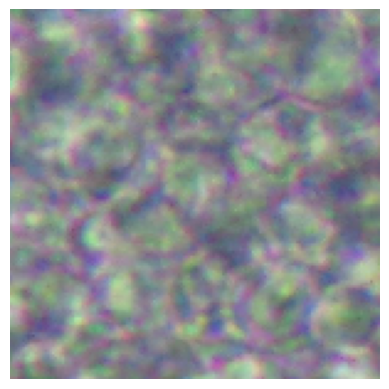

In [31]:
# Load one batch of images and labels
X_batch, y_batch = next(train_dataset)

# Display the first image from the batch
print(y_batch[0])
print(X_batch[0])

plt.imshow(X_batch[0])
plt.axis('off')
plt.show()

In [41]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(rate=0.3),

    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dropout(rate=0.3),

    tf.keras.layers.Dense(units=9, activation='softmax')
])

C:\Users\asith\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
# Compile the model
learning_rate = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [43]:
model_fit = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=20
)

Epoch 1/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 64s 820ms/step - accuracy: 0.2847 - loss: 2.1788 - val_accuracy: 0.3379 - val_loss: 2.0779
Epoch 2/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 62s 818ms/step - accuracy: 0.3996 - loss: 1.6247 - val_accuracy: 0.3801 - val_loss: 1.9977
Epoch 3/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 62s 813ms/step - accuracy: 0.4544 - loss: 1.4303 - val_accuracy: 0.3478 - val_loss: 1.8692
Epoch 4/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 62s 817ms/step - accuracy: 0.4814 - loss: 1.3785 - val_accuracy: 0.4857 - val_loss: 1.7608
Epoch 5/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 62s 821ms/step - accuracy: 0.5029 - loss: 1.2913 - val_accuracy: 0.5056 - val_loss: 1.6599
Epoch 6/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 62s 814ms/step - accuracy: 0.5240 - loss: 1.2326 - val_accuracy: 0.5938 - val_loss: 1.4387
Epoch 7/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 62s 823ms/step - accuracy: 0.5610 - loss: 1.1286 - val_accuracy: 0.5193 - val_loss: 1.2507
Epoch 8/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 61s 803ms/step - accuracy: 0.5694 - loss: 1.1141 - val_accu

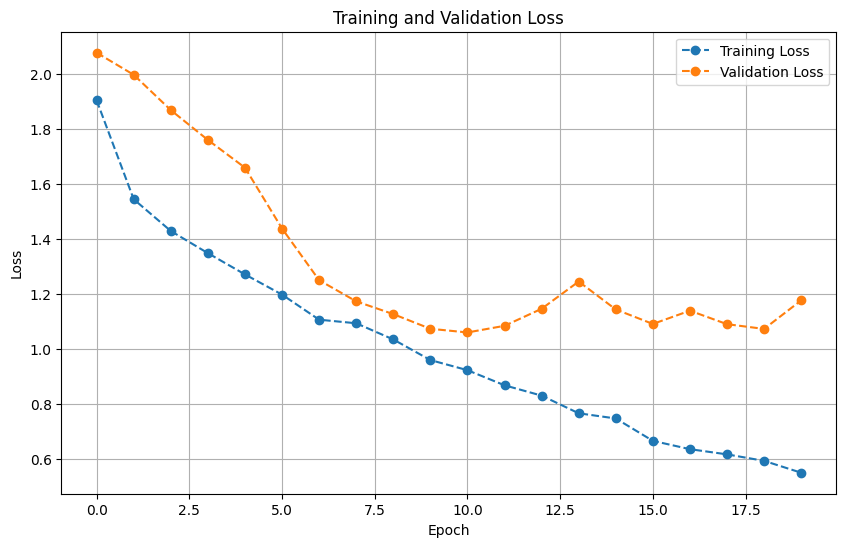

In [44]:
# Plot training, validation, and testing loss with respect to epochs
plt.figure(figsize=(10, 6))
plt.plot(model_fit.history['loss'], label='Training Loss', linestyle='--', marker='o')
plt.plot(model_fit.history['val_loss'], label='Validation Loss', linestyle='--', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [45]:
test = ImageDataGenerator(rescale=1/255)


test_dataset = test.flow_from_directory(main_dir + "/test",target_size=(150, 150),batch_size=32,class_mode='sparse')

#Evaluate the model on the test dataset
from sklearn.metrics import precision_score, recall_score, classification_report

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_dataset, verbose=1)

# Obtain true labels and predicted labels
y_true = []
y_pred = []

# for i, batch in enumerate(test_dataset):
#     inputs, labels = batch  
#     y_true.extend(labels if isinstance(labels, (list, np.ndarray)) else labels.numpy())
#     predictions = model.predict(inputs)
#     y_pred.extend(predictions.argmax(axis=1))  

# Calculate precision and recall
# precision = precision_score(y_true, y_pred, average="weighted")
# recall = recall_score(y_true, y_pred, average="weighted")

# Print the evaluation results
print(f"Model Evaluation Results:")
print(f"- Test Loss: {test_loss:.4f}")
print(f"- Test Accuracy: {test_accuracy:.4f}")
# print(f"- Precision: {precision:.4f}")
# print(f"- Recall: {recall:.4f}")

Found 805 images belonging to 5 classes.


C:\Users\asith\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 121ms/step - accuracy: 0.5409 - loss: 1.2292
Model Evaluation Results:
- Test Loss: 1.2060
- Test Accuracy: 0.5640


26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step


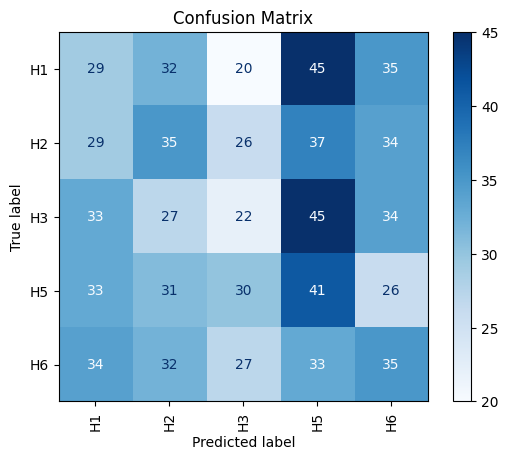

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Step 1: Generate predictions
test_dataset.reset()  # Reset the generator to start from the first batch
y_pred = model.predict(test_dataset)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Step 2: Get true labels
y_true = test_dataset.classes  # Actual labels from the dataset

# Step 3: Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Step 4: Display confusion matrix
labels = list(test_dataset.class_indices.keys())  # Class names
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')

plt.title("Confusion Matrix")
plt.show()


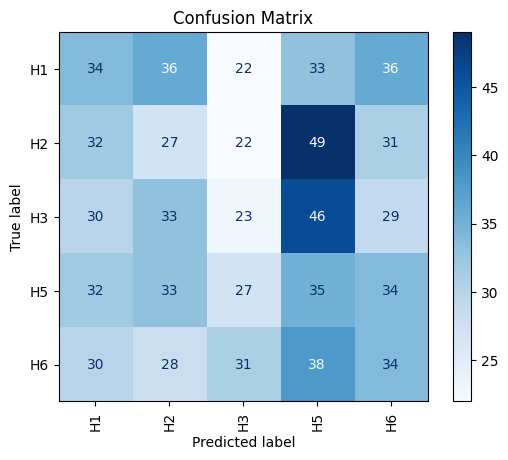

In [47]:
lst = np.array([])

for i in range(len(test_dataset)):
    lst = np.concatenate((lst, test_dataset[i][1]))

# print(lst)
# print(y_pred_classes)



# Step 3: Compute confusion matrix
cm = confusion_matrix(lst, y_pred_classes)

# Step 4: Display confusion matrix
labels = list(test_dataset.class_indices.keys())  # Class names
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')

plt.title("Confusion Matrix")
plt.show()

Found 2410 images belonging to 5 classes.
Found 805 images belonging to 5 classes.
Found 805 images belonging to 5 classes.
Training ResNet50...
Epoch 1/15
76/76 ━━━━━━━━━━━━━━━━━━━━ 42s 482ms/step - accuracy: 0.2209 - loss: 1.6789 - val_accuracy: 0.2000 - val_loss: 1.6166
Epoch 2/15
76/76 ━━━━━━━━━━━━━━━━━━━━ 35s 464ms/step - accuracy: 0.1877 - loss: 1.6237 - val_accuracy: 0.2000 - val_loss: 1.6083
Epoch 3/15
76/76 ━━━━━━━━━━━━━━━━━━━━ 35s 465ms/step - accuracy: 0.2085 - loss: 1.6097 - val_accuracy: 0.2012 - val_loss: 1.6076
Epoch 4/15
76/76 ━━━━━━━━━━━━━━━━━━━━ 35s 464ms/step - accuracy: 0.2287 - loss: 1.6079 - val_accuracy: 0.2000 - val_loss: 1.6087
Epoch 5/15
76/76 ━━━━━━━━━━━━━━━━━━━━ 46s 609ms/step - accuracy: 0.1919 - loss: 1.6097 - val_accuracy: 0.2795 - val_loss: 1.6077
Epoch 6/15
76/76 ━━━━━━━━━━━━━━━━━━━━ 36s 477ms/step - accuracy: 0.2210 - loss: 1.6084 - val_accuracy: 0.2199 - val_loss: 1.6073
Epoch 7/15
76/76 ━━━━━━━━━━━━━━━━━━━━ 37s 490ms/step - accuracy: 0.2307 - loss: 1

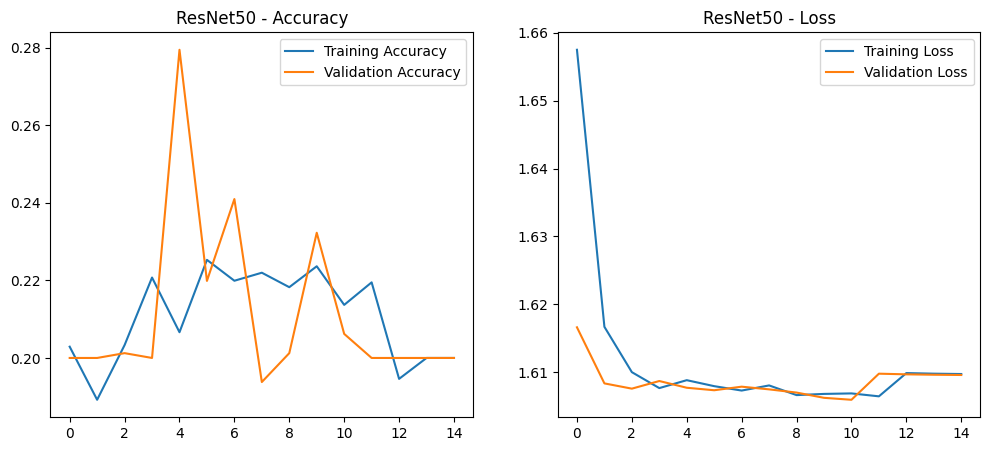

Training DenseNet121...
Epoch 1/15
76/76 ━━━━━━━━━━━━━━━━━━━━ 49s 507ms/step - accuracy: 0.2228 - loss: 1.8725 - val_accuracy: 0.4335 - val_loss: 1.3975
Epoch 2/15
76/76 ━━━━━━━━━━━━━━━━━━━━ 35s 460ms/step - accuracy: 0.3745 - loss: 1.4565 - val_accuracy: 0.5329 - val_loss: 1.2766
Epoch 3/15
76/76 ━━━━━━━━━━━━━━━━━━━━ 35s 457ms/step - accuracy: 0.4317 - loss: 1.3473 - val_accuracy: 0.5516 - val_loss: 1.2027
Epoch 4/15
76/76 ━━━━━━━━━━━━━━━━━━━━ 35s 464ms/step - accuracy: 0.4875 - loss: 1.2350 - val_accuracy: 0.5814 - val_loss: 1.1465
Epoch 5/15
76/76 ━━━━━━━━━━━━━━━━━━━━ 39s 507ms/step - accuracy: 0.5016 - loss: 1.2372 - val_accuracy: 0.5752 - val_loss: 1.1106
Epoch 6/15
76/76 ━━━━━━━━━━━━━━━━━━━━ 35s 466ms/step - accuracy: 0.5282 - loss: 1.1638 - val_accuracy: 0.6012 - val_loss: 1.0740
Epoch 7/15
76/76 ━━━━━━━━━━━━━━━━━━━━ 35s 463ms/step - accuracy: 0.5610 - loss: 1.1027 - val_accuracy: 0.6012 - val_loss: 1.0455
Epoch 8/15
76/76 ━━━━━━━━━━━━━━━━━━━━ 35s 462ms/step - accuracy: 0.5963 -

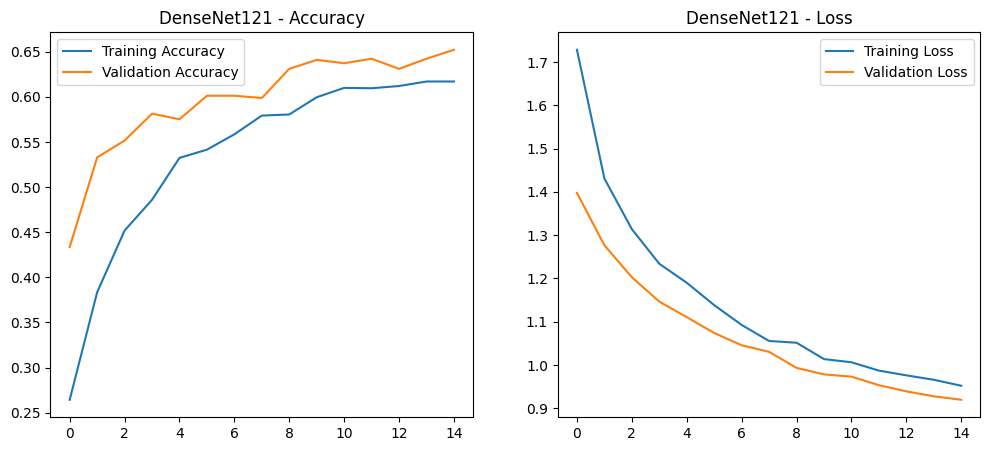

26/26 ━━━━━━━━━━━━━━━━━━━━ 9s 335ms/step - accuracy: 0.0373 - loss: 1.6219
26/26 ━━━━━━━━━━━━━━━━━━━━ 9s 329ms/step - accuracy: 0.5731 - loss: 1.0159
ResNet50 Confusion Matrix and Report
26/26 ━━━━━━━━━━━━━━━━━━━━ 11s 381ms/step


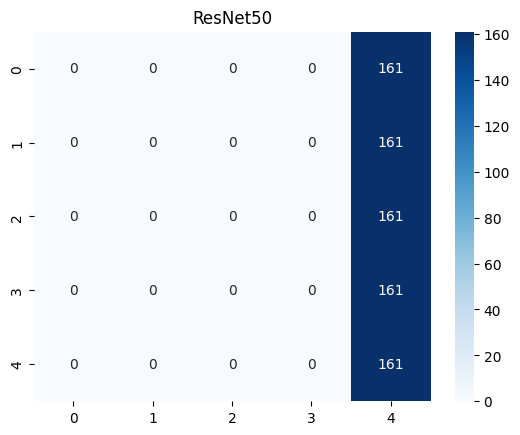

              precision    recall  f1-score   support

          H1       0.00      0.00      0.00       161
          H2       0.00      0.00      0.00       161
          H3       0.00      0.00      0.00       161
          H5       0.00      0.00      0.00       161
          H6       0.20      1.00      0.33       161

    accuracy                           0.20       805
   macro avg       0.04      0.20      0.07       805
weighted avg       0.04      0.20      0.07       805

DenseNet121 Confusion Matrix and Report


C:\Users\asith\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\asith\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\asith\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

26/26 ━━━━━━━━━━━━━━━━━━━━ 15s 452ms/step


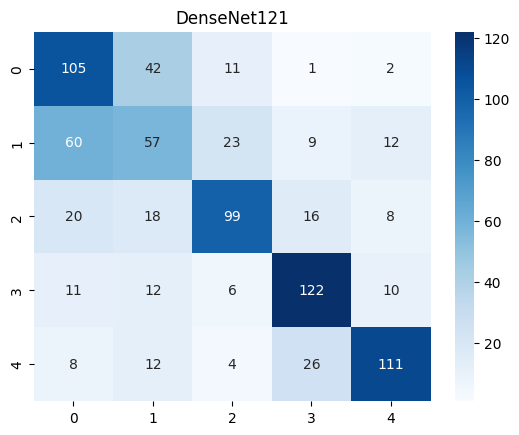

              precision    recall  f1-score   support

          H1       0.51      0.65      0.58       161
          H2       0.40      0.35      0.38       161
          H3       0.69      0.61      0.65       161
          H5       0.70      0.76      0.73       161
          H6       0.78      0.69      0.73       161

    accuracy                           0.61       805
   macro avg       0.62      0.61      0.61       805
weighted avg       0.62      0.61      0.61       805

ResNet50 Test Accuracy: 0.20
DenseNet121 Test Accuracy: 0.61


In [40]:
# Required Libraries
from tensorflow.keras.applications import ResNet50, DenseNet121
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset Preparation
# Assume the dataset is structured in folders:
# train/, val/, and test/ containing subfolders for each class.
image_size = (128, 128)
batch_size = 32

train_dir = main_dir + "/train"
val_dir = main_dir+ "/val"
test_dir = main_dir+ "/test"

# Data Augmentation
train_datagen = ImageDataGenerator(rescale=1.0/255.0, rotation_range=20, width_shift_range=0.2, 
                                   height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_data = train_datagen.flow_from_directory(train_dir, target_size=image_size, batch_size=batch_size, class_mode='sparse')
val_data = val_datagen.flow_from_directory(val_dir, target_size=image_size, batch_size=batch_size, class_mode='sparse')
test_data = test_datagen.flow_from_directory(test_dir, target_size=image_size, batch_size=batch_size, class_mode='sparse', shuffle=False)

# Define Helper Functions
def plot_metrics(history, title):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.legend()
    plt.show()

# Load Pre-Trained Models
# 1. ResNet50
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
resnet_base.trainable = False

resnet_model = Sequential([
    resnet_base,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_data.class_indices), activation='softmax')
])
resnet_model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 2. DenseNet121
densenet_base = DenseNet121(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
densenet_base.trainable = False

densenet_model = Sequential([
    densenet_base,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_data.class_indices), activation='softmax')
])
densenet_model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train ResNet50
print("Training ResNet50...")
history_resnet = resnet_model.fit(train_data, validation_data=val_data, epochs=15)
plot_metrics(history_resnet, "ResNet50")

# Train DenseNet121
print("Training DenseNet121...")
history_densenet = densenet_model.fit(train_data, validation_data=val_data, epochs=15)
plot_metrics(history_densenet, "DenseNet121")

# Evaluate on Test Data
resnet_loss, resnet_acc = resnet_model.evaluate(test_data)
densenet_loss, densenet_acc = densenet_model.evaluate(test_data)

# Generate Confusion Matrices and Classification Reports
def plot_confusion_matrix(model, test_data, title):
    preds = np.argmax(model.predict(test_data), axis=-1)
    cm = confusion_matrix(test_data.classes, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.show()
    print(classification_report(test_data.classes, preds, target_names=list(test_data.class_indices.keys())))

print("ResNet50 Confusion Matrix and Report")
plot_confusion_matrix(resnet_model, test_data, "ResNet50")

print("DenseNet121 Confusion Matrix and Report")
plot_confusion_matrix(densenet_model, test_data, "DenseNet121")

# Summary and Comparison
print(f"ResNet50 Test Accuracy: {resnet_acc:.2f}")
print(f"DenseNet121 Test Accuracy: {densenet_acc:.2f}")